# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

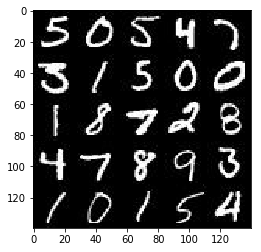

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

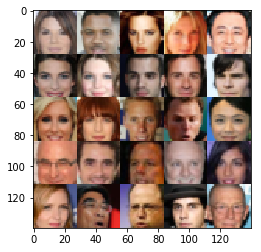

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='inputs_z')
    learning_rate = tf.placeholder(tf.float32, None, name='learning_rate')
    
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def leakyReLU(x, alpha=0.2):
    return tf.maximum(alpha * x, x)

def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s) //dataset will be in the range of -0.5 to 0.5 of 28x28
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha=0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 4, strides=2, padding='same')
        relu1 = leakyReLU(x1)
        
        # now 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 4, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = leakyReLU(bn2)
        
        # now 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 4, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = leakyReLU(bn3)
        
        # now 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    reuse = not is_train
    alpha=0.2
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        x1 = tf.layers.dense(z, 4*4*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        bn1 = tf.layers.batch_normalization(x1, training=is_train)
        relu1 = leakyReLU(bn1)
        #print(relu1.shape)
        # 4x4x512 now
        
        x2 = tf.layers.conv2d_transpose(relu1, 256, 4, strides=1, padding='valid')
        bn2 = tf.layers.batch_normalization(x2, training=is_train)
        relu2 = leakyReLU(bn2)
        #print(relu2.shape)
        # 7x7x256 now
        
        x3 = tf.layers.conv2d_transpose(relu2, 128, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=is_train)
        relu3 = leakyReLU(bn3)
        #print(relu3.shape)
        # 14x14x256 now
    
        # Output layer
        logits = tf.layers.conv2d_transpose(relu3, out_channel_dim, 5, strides=2, padding='same')
        #print(logits.shape)
        # 28x28xoutput_dim now
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    d_out_real, d_logits_real = discriminator(input_real, reuse=False)
    g_out_fake = generator(input_z, out_channel_dim, is_train=True)
    d_out_fake, d_logits_fake = discriminator(g_out_fake, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                labels=tf.ones_like(d_out_real)))
    
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                labels=tf.zeros_like(d_out_fake)))
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                labels=tf.ones_like(d_out_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function

    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

    return None, None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
   
    
    #? tf.reset_default_graph()
    print(data_shape)
    _, image_width, image_height, image_channels = data_shape
    
    # get placeholders
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    
    # get losses
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    
    # get optimizers    
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    # Train Model
    print_every = 25
    show_every = 200
    saver = tf.train.Saver()
    
    steps = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                # TODO: Train Model
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, 
                                               input_z: batch_z, 
                                               lr:learning_rate})
                
                _ = sess.run(g_opt, feed_dict={input_real: batch_images,
                                               input_z: batch_z, 
                                               lr:learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_real: batch_images,
                                                input_z: batch_z, 
                                                lr:learning_rate})
                    
                    train_loss_g = g_loss.eval({input_real: batch_images,
                                                input_z: batch_z, 
                                                lr:learning_rate})

                    print("Epoch: {}/{};".format(epoch_i+1, epochs),
                          "Batch: {:5d};".format(steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)

                    
        saver.save(sess, './generator.ckpt')


### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

(60000, 28, 28, 1)
Epoch: 1/2; Batch:    25; Discriminator Loss: 1.3676... Generator Loss: 0.5320
Epoch: 1/2; Batch:    50; Discriminator Loss: 0.9570... Generator Loss: 0.8692
Epoch: 1/2; Batch:    75; Discriminator Loss: 0.7221... Generator Loss: 1.0206
Epoch: 1/2; Batch:   100; Discriminator Loss: 0.9774... Generator Loss: 0.9190
Epoch: 1/2; Batch:   125; Discriminator Loss: 1.0014... Generator Loss: 0.7859
Epoch: 1/2; Batch:   150; Discriminator Loss: 0.7199... Generator Loss: 1.2796
Epoch: 1/2; Batch:   175; Discriminator Loss: 0.8661... Generator Loss: 1.3188
Epoch: 1/2; Batch:   200; Discriminator Loss: 0.7754... Generator Loss: 0.9189


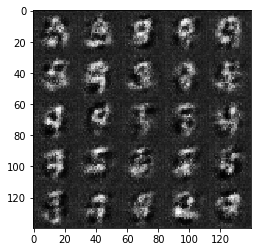

Epoch: 1/2; Batch:   225; Discriminator Loss: 0.7844... Generator Loss: 0.8432
Epoch: 1/2; Batch:   250; Discriminator Loss: 0.6396... Generator Loss: 2.4998
Epoch: 1/2; Batch:   275; Discriminator Loss: 0.7878... Generator Loss: 0.7881
Epoch: 1/2; Batch:   300; Discriminator Loss: 0.2047... Generator Loss: 2.2690
Epoch: 1/2; Batch:   325; Discriminator Loss: 0.4147... Generator Loss: 1.4113
Epoch: 1/2; Batch:   350; Discriminator Loss: 0.3484... Generator Loss: 1.6068
Epoch: 1/2; Batch:   375; Discriminator Loss: 0.2304... Generator Loss: 2.0905
Epoch: 1/2; Batch:   400; Discriminator Loss: 0.3191... Generator Loss: 1.6100


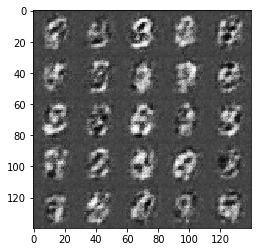

Epoch: 1/2; Batch:   425; Discriminator Loss: 0.2934... Generator Loss: 1.8708
Epoch: 1/2; Batch:   450; Discriminator Loss: 0.2871... Generator Loss: 1.7439
Epoch: 1/2; Batch:   475; Discriminator Loss: 0.2662... Generator Loss: 2.0104
Epoch: 1/2; Batch:   500; Discriminator Loss: 0.5630... Generator Loss: 1.0365
Epoch: 1/2; Batch:   525; Discriminator Loss: 0.3047... Generator Loss: 1.7996
Epoch: 1/2; Batch:   550; Discriminator Loss: 0.1947... Generator Loss: 2.2517
Epoch: 1/2; Batch:   575; Discriminator Loss: 0.2579... Generator Loss: 1.9540
Epoch: 1/2; Batch:   600; Discriminator Loss: 0.1904... Generator Loss: 2.1238


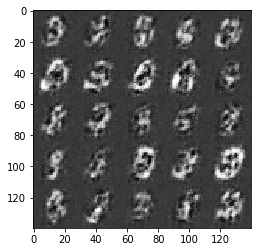

Epoch: 1/2; Batch:   625; Discriminator Loss: 0.2159... Generator Loss: 2.2287
Epoch: 1/2; Batch:   650; Discriminator Loss: 0.2594... Generator Loss: 1.7767
Epoch: 1/2; Batch:   675; Discriminator Loss: 0.1914... Generator Loss: 2.0616
Epoch: 1/2; Batch:   700; Discriminator Loss: 0.1514... Generator Loss: 2.5792
Epoch: 1/2; Batch:   725; Discriminator Loss: 0.1885... Generator Loss: 2.2592
Epoch: 1/2; Batch:   750; Discriminator Loss: 0.1821... Generator Loss: 2.6772
Epoch: 1/2; Batch:   775; Discriminator Loss: 0.2909... Generator Loss: 1.6986
Epoch: 1/2; Batch:   800; Discriminator Loss: 0.1929... Generator Loss: 2.1121


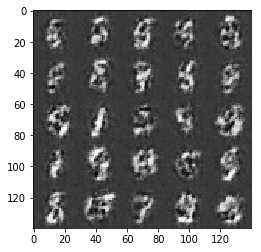

Epoch: 1/2; Batch:   825; Discriminator Loss: 0.1534... Generator Loss: 2.5340
Epoch: 1/2; Batch:   850; Discriminator Loss: 0.2207... Generator Loss: 2.1261
Epoch: 1/2; Batch:   875; Discriminator Loss: 0.1178... Generator Loss: 2.5459
Epoch: 1/2; Batch:   900; Discriminator Loss: 0.0882... Generator Loss: 3.4643
Epoch: 1/2; Batch:   925; Discriminator Loss: 0.1104... Generator Loss: 2.8748
Epoch: 1/2; Batch:   950; Discriminator Loss: 0.1102... Generator Loss: 2.7735
Epoch: 1/2; Batch:   975; Discriminator Loss: 0.1160... Generator Loss: 2.7526
Epoch: 1/2; Batch:  1000; Discriminator Loss: 0.2758... Generator Loss: 2.0855


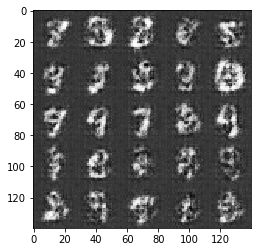

Epoch: 1/2; Batch:  1025; Discriminator Loss: 0.2292... Generator Loss: 2.1247
Epoch: 1/2; Batch:  1050; Discriminator Loss: 0.2358... Generator Loss: 2.0525
Epoch: 1/2; Batch:  1075; Discriminator Loss: 0.1753... Generator Loss: 2.3876
Epoch: 1/2; Batch:  1100; Discriminator Loss: 0.0774... Generator Loss: 3.2342
Epoch: 1/2; Batch:  1125; Discriminator Loss: 0.1724... Generator Loss: 2.2122
Epoch: 1/2; Batch:  1150; Discriminator Loss: 0.1663... Generator Loss: 2.3362
Epoch: 1/2; Batch:  1175; Discriminator Loss: 0.1386... Generator Loss: 2.6196
Epoch: 1/2; Batch:  1200; Discriminator Loss: 0.1302... Generator Loss: 2.4273


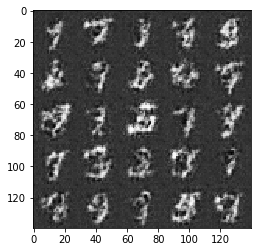

Epoch: 1/2; Batch:  1225; Discriminator Loss: 0.0890... Generator Loss: 3.0941
Epoch: 1/2; Batch:  1250; Discriminator Loss: 0.1108... Generator Loss: 2.7129
Epoch: 1/2; Batch:  1275; Discriminator Loss: 0.1289... Generator Loss: 2.4247
Epoch: 1/2; Batch:  1300; Discriminator Loss: 0.0514... Generator Loss: 3.4703
Epoch: 1/2; Batch:  1325; Discriminator Loss: 0.1285... Generator Loss: 2.6774
Epoch: 1/2; Batch:  1350; Discriminator Loss: 0.0786... Generator Loss: 3.2116
Epoch: 1/2; Batch:  1375; Discriminator Loss: 0.0245... Generator Loss: 4.7945
Epoch: 1/2; Batch:  1400; Discriminator Loss: 0.2061... Generator Loss: 2.3541


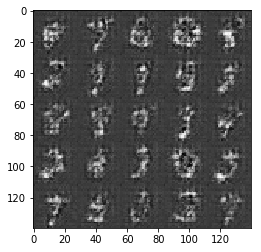

Epoch: 1/2; Batch:  1425; Discriminator Loss: 0.1012... Generator Loss: 2.8556
Epoch: 1/2; Batch:  1450; Discriminator Loss: 0.0439... Generator Loss: 3.8039
Epoch: 1/2; Batch:  1475; Discriminator Loss: 0.0215... Generator Loss: 4.6623
Epoch: 1/2; Batch:  1500; Discriminator Loss: 0.0240... Generator Loss: 4.1296
Epoch: 1/2; Batch:  1525; Discriminator Loss: 0.0524... Generator Loss: 3.4703
Epoch: 1/2; Batch:  1550; Discriminator Loss: 0.0890... Generator Loss: 3.0937
Epoch: 1/2; Batch:  1575; Discriminator Loss: 0.0214... Generator Loss: 4.4299
Epoch: 1/2; Batch:  1600; Discriminator Loss: 0.0215... Generator Loss: 4.5738


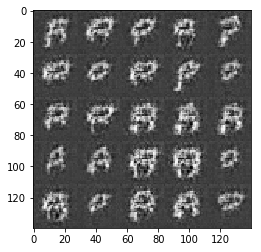

Epoch: 1/2; Batch:  1625; Discriminator Loss: 0.0393... Generator Loss: 3.8615
Epoch: 1/2; Batch:  1650; Discriminator Loss: 0.0180... Generator Loss: 4.8137
Epoch: 1/2; Batch:  1675; Discriminator Loss: 0.0474... Generator Loss: 3.7203
Epoch: 1/2; Batch:  1700; Discriminator Loss: 0.0435... Generator Loss: 6.6641
Epoch: 1/2; Batch:  1725; Discriminator Loss: 0.0458... Generator Loss: 3.6020
Epoch: 1/2; Batch:  1750; Discriminator Loss: 0.0553... Generator Loss: 3.3944
Epoch: 1/2; Batch:  1775; Discriminator Loss: 0.0241... Generator Loss: 4.3982
Epoch: 1/2; Batch:  1800; Discriminator Loss: 0.0982... Generator Loss: 3.2241


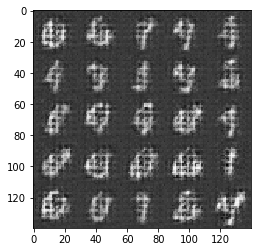

Epoch: 1/2; Batch:  1825; Discriminator Loss: 0.1280... Generator Loss: 2.5723
Epoch: 1/2; Batch:  1850; Discriminator Loss: 0.0697... Generator Loss: 3.2100
Epoch: 1/2; Batch:  1875; Discriminator Loss: 0.0901... Generator Loss: 3.2180
Epoch: 2/2; Batch:  1900; Discriminator Loss: 0.0872... Generator Loss: 3.2096
Epoch: 2/2; Batch:  1925; Discriminator Loss: 0.0824... Generator Loss: 3.8430
Epoch: 2/2; Batch:  1950; Discriminator Loss: 0.0426... Generator Loss: 3.7322
Epoch: 2/2; Batch:  1975; Discriminator Loss: 0.0936... Generator Loss: 2.6933
Epoch: 2/2; Batch:  2000; Discriminator Loss: 0.0800... Generator Loss: 3.0803


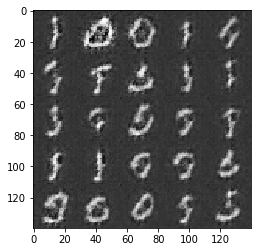

Epoch: 2/2; Batch:  2025; Discriminator Loss: 0.2834... Generator Loss: 1.6453
Epoch: 2/2; Batch:  2050; Discriminator Loss: 0.1146... Generator Loss: 2.7289
Epoch: 2/2; Batch:  2075; Discriminator Loss: 0.2498... Generator Loss: 1.7810
Epoch: 2/2; Batch:  2100; Discriminator Loss: 0.1475... Generator Loss: 2.3967
Epoch: 2/2; Batch:  2125; Discriminator Loss: 0.2898... Generator Loss: 1.9654
Epoch: 2/2; Batch:  2150; Discriminator Loss: 0.1437... Generator Loss: 2.5479
Epoch: 2/2; Batch:  2175; Discriminator Loss: 0.1617... Generator Loss: 2.6533
Epoch: 2/2; Batch:  2200; Discriminator Loss: 0.1780... Generator Loss: 2.2231


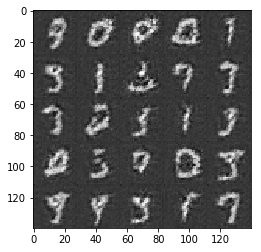

Epoch: 2/2; Batch:  2225; Discriminator Loss: 0.0707... Generator Loss: 3.1279
Epoch: 2/2; Batch:  2250; Discriminator Loss: 0.0246... Generator Loss: 5.1738
Epoch: 2/2; Batch:  2275; Discriminator Loss: 0.1652... Generator Loss: 2.2710
Epoch: 2/2; Batch:  2300; Discriminator Loss: 0.0662... Generator Loss: 3.4381
Epoch: 2/2; Batch:  2325; Discriminator Loss: 0.0613... Generator Loss: 3.4204
Epoch: 2/2; Batch:  2350; Discriminator Loss: 0.0457... Generator Loss: 4.4168
Epoch: 2/2; Batch:  2375; Discriminator Loss: 0.3505... Generator Loss: 1.6220
Epoch: 2/2; Batch:  2400; Discriminator Loss: 0.2028... Generator Loss: 2.1481


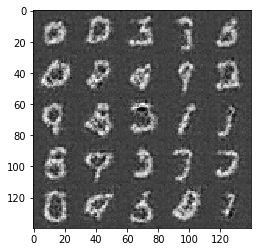

Epoch: 2/2; Batch:  2425; Discriminator Loss: 0.0779... Generator Loss: 3.2243
Epoch: 2/2; Batch:  2450; Discriminator Loss: 0.1609... Generator Loss: 2.3006
Epoch: 2/2; Batch:  2475; Discriminator Loss: 0.0904... Generator Loss: 2.8987
Epoch: 2/2; Batch:  2500; Discriminator Loss: 0.1255... Generator Loss: 2.4517
Epoch: 2/2; Batch:  2525; Discriminator Loss: 0.1247... Generator Loss: 2.6784
Epoch: 2/2; Batch:  2550; Discriminator Loss: 0.0677... Generator Loss: 3.2742
Epoch: 2/2; Batch:  2575; Discriminator Loss: 0.0529... Generator Loss: 3.9387
Epoch: 2/2; Batch:  2600; Discriminator Loss: 0.0704... Generator Loss: 3.2430


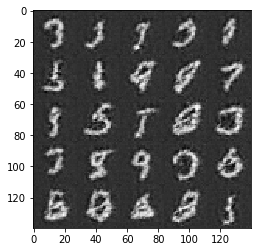

Epoch: 2/2; Batch:  2625; Discriminator Loss: 0.1477... Generator Loss: 2.2921
Epoch: 2/2; Batch:  2650; Discriminator Loss: 0.1922... Generator Loss: 2.4077
Epoch: 2/2; Batch:  2675; Discriminator Loss: 0.1069... Generator Loss: 2.9247
Epoch: 2/2; Batch:  2700; Discriminator Loss: 0.1162... Generator Loss: 2.9256
Epoch: 2/2; Batch:  2725; Discriminator Loss: 0.1357... Generator Loss: 2.6165
Epoch: 2/2; Batch:  2750; Discriminator Loss: 0.0363... Generator Loss: 4.3721
Epoch: 2/2; Batch:  2775; Discriminator Loss: 0.0379... Generator Loss: 4.6307
Epoch: 2/2; Batch:  2800; Discriminator Loss: 0.1083... Generator Loss: 2.8404


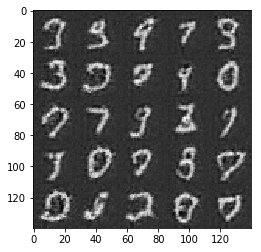

Epoch: 2/2; Batch:  2825; Discriminator Loss: 0.1492... Generator Loss: 2.4660
Epoch: 2/2; Batch:  2850; Discriminator Loss: 0.1372... Generator Loss: 2.4879
Epoch: 2/2; Batch:  2875; Discriminator Loss: 0.1876... Generator Loss: 2.1676
Epoch: 2/2; Batch:  2900; Discriminator Loss: 0.2197... Generator Loss: 1.9490
Epoch: 2/2; Batch:  2925; Discriminator Loss: 0.1746... Generator Loss: 2.2023
Epoch: 2/2; Batch:  2950; Discriminator Loss: 0.0904... Generator Loss: 2.7410
Epoch: 2/2; Batch:  2975; Discriminator Loss: 0.0572... Generator Loss: 3.3246
Epoch: 2/2; Batch:  3000; Discriminator Loss: 0.0178... Generator Loss: 5.3439


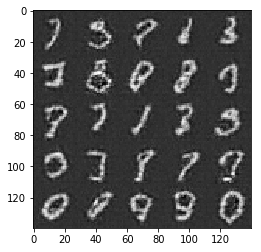

Epoch: 2/2; Batch:  3025; Discriminator Loss: 0.1960... Generator Loss: 2.1658
Epoch: 2/2; Batch:  3050; Discriminator Loss: 0.2049... Generator Loss: 2.0018
Epoch: 2/2; Batch:  3075; Discriminator Loss: 0.0766... Generator Loss: 3.1117
Epoch: 2/2; Batch:  3100; Discriminator Loss: 0.0430... Generator Loss: 4.0589
Epoch: 2/2; Batch:  3125; Discriminator Loss: 0.0827... Generator Loss: 3.2368
Epoch: 2/2; Batch:  3150; Discriminator Loss: 0.0829... Generator Loss: 3.1217
Epoch: 2/2; Batch:  3175; Discriminator Loss: 0.0849... Generator Loss: 2.9550
Epoch: 2/2; Batch:  3200; Discriminator Loss: 0.0215... Generator Loss: 4.8536


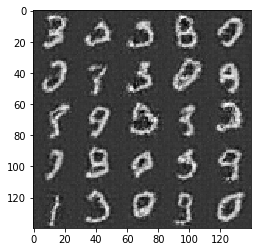

Epoch: 2/2; Batch:  3225; Discriminator Loss: 0.0547... Generator Loss: 3.5543
Epoch: 2/2; Batch:  3250; Discriminator Loss: 0.0642... Generator Loss: 3.3347
Epoch: 2/2; Batch:  3275; Discriminator Loss: 0.0906... Generator Loss: 2.8153
Epoch: 2/2; Batch:  3300; Discriminator Loss: 0.0286... Generator Loss: 6.1169
Epoch: 2/2; Batch:  3325; Discriminator Loss: 0.0205... Generator Loss: 5.2160
Epoch: 2/2; Batch:  3350; Discriminator Loss: 0.0162... Generator Loss: 6.2820
Epoch: 2/2; Batch:  3375; Discriminator Loss: 0.0236... Generator Loss: 4.7848
Epoch: 2/2; Batch:  3400; Discriminator Loss: 0.4868... Generator Loss: 1.6030


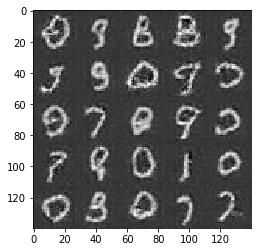

Epoch: 2/2; Batch:  3425; Discriminator Loss: 0.2385... Generator Loss: 2.2582
Epoch: 2/2; Batch:  3450; Discriminator Loss: 0.1948... Generator Loss: 2.1996
Epoch: 2/2; Batch:  3475; Discriminator Loss: 0.1567... Generator Loss: 4.1876
Epoch: 2/2; Batch:  3500; Discriminator Loss: 0.1129... Generator Loss: 2.6825
Epoch: 2/2; Batch:  3525; Discriminator Loss: 0.0530... Generator Loss: 3.9328
Epoch: 2/2; Batch:  3550; Discriminator Loss: 0.2476... Generator Loss: 1.8854
Epoch: 2/2; Batch:  3575; Discriminator Loss: 0.2091... Generator Loss: 2.1379
Epoch: 2/2; Batch:  3600; Discriminator Loss: 0.3126... Generator Loss: 1.6825


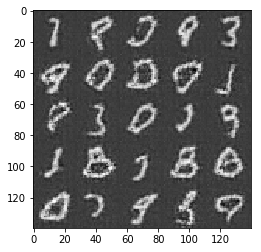

Epoch: 2/2; Batch:  3625; Discriminator Loss: 0.0231... Generator Loss: 6.1206
Epoch: 2/2; Batch:  3650; Discriminator Loss: 0.0964... Generator Loss: 2.9524
Epoch: 2/2; Batch:  3675; Discriminator Loss: 0.0191... Generator Loss: 4.9865
Epoch: 2/2; Batch:  3700; Discriminator Loss: 0.0520... Generator Loss: 3.4430
Epoch: 2/2; Batch:  3725; Discriminator Loss: 0.0347... Generator Loss: 4.0019
Epoch: 2/2; Batch:  3750; Discriminator Loss: 0.0184... Generator Loss: 4.8775


In [14]:
batch_size = 32
z_dim = 200
learning_rate = 0.001
beta1 = 0.2
# ==> Generator Loss gets bigger over, imgages gets bader

batch_size = 32
z_dim = 200
learning_rate = 0.0001
beta1 = 0.2

batch_size = 32
z_dim = 100
learning_rate = 0.0001
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

(202599, 28, 28, 3)
Epoch: 1/1; Batch:    25; Discriminator Loss: 1.5158... Generator Loss: 0.5100
Epoch: 1/1; Batch:    50; Discriminator Loss: 0.9284... Generator Loss: 0.9226
Epoch: 1/1; Batch:    75; Discriminator Loss: 0.6608... Generator Loss: 1.0975
Epoch: 1/1; Batch:   100; Discriminator Loss: 0.5506... Generator Loss: 2.9993
Epoch: 1/1; Batch:   125; Discriminator Loss: 0.4689... Generator Loss: 1.8735
Epoch: 1/1; Batch:   150; Discriminator Loss: 0.4096... Generator Loss: 1.7163
Epoch: 1/1; Batch:   175; Discriminator Loss: 0.3040... Generator Loss: 2.8427
Epoch: 1/1; Batch:   200; Discriminator Loss: 0.3526... Generator Loss: 1.7434


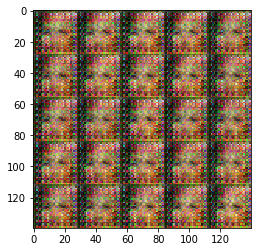

Epoch: 1/1; Batch:   225; Discriminator Loss: 0.2940... Generator Loss: 1.8295
Epoch: 1/1; Batch:   250; Discriminator Loss: 0.1150... Generator Loss: 2.8702
Epoch: 1/1; Batch:   275; Discriminator Loss: 0.1270... Generator Loss: 2.5998
Epoch: 1/1; Batch:   300; Discriminator Loss: 0.1690... Generator Loss: 2.5002
Epoch: 1/1; Batch:   325; Discriminator Loss: 0.2015... Generator Loss: 2.6962
Epoch: 1/1; Batch:   350; Discriminator Loss: 0.2073... Generator Loss: 2.4409
Epoch: 1/1; Batch:   375; Discriminator Loss: 0.1826... Generator Loss: 2.2494
Epoch: 1/1; Batch:   400; Discriminator Loss: 0.1203... Generator Loss: 2.8434


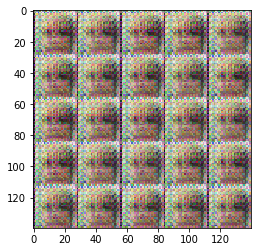

Epoch: 1/1; Batch:   425; Discriminator Loss: 0.1249... Generator Loss: 3.1564
Epoch: 1/1; Batch:   450; Discriminator Loss: 0.1488... Generator Loss: 2.7057
Epoch: 1/1; Batch:   475; Discriminator Loss: 0.0969... Generator Loss: 3.9835
Epoch: 1/1; Batch:   500; Discriminator Loss: 0.2254... Generator Loss: 2.2471
Epoch: 1/1; Batch:   525; Discriminator Loss: 0.1399... Generator Loss: 2.8750
Epoch: 1/1; Batch:   550; Discriminator Loss: 0.2429... Generator Loss: 2.3704
Epoch: 1/1; Batch:   575; Discriminator Loss: 0.2068... Generator Loss: 2.6970
Epoch: 1/1; Batch:   600; Discriminator Loss: 0.1900... Generator Loss: 3.3063


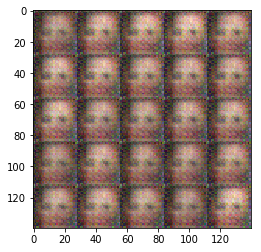

Epoch: 1/1; Batch:   625; Discriminator Loss: 1.0914... Generator Loss: 1.0293
Epoch: 1/1; Batch:   650; Discriminator Loss: 0.6494... Generator Loss: 1.1133
Epoch: 1/1; Batch:   675; Discriminator Loss: 0.7264... Generator Loss: 0.8474
Epoch: 1/1; Batch:   700; Discriminator Loss: 0.3951... Generator Loss: 1.7446
Epoch: 1/1; Batch:   725; Discriminator Loss: 0.7572... Generator Loss: 1.4896
Epoch: 1/1; Batch:   750; Discriminator Loss: 0.3282... Generator Loss: 1.8002
Epoch: 1/1; Batch:   775; Discriminator Loss: 0.5041... Generator Loss: 1.6452
Epoch: 1/1; Batch:   800; Discriminator Loss: 0.7589... Generator Loss: 0.9314


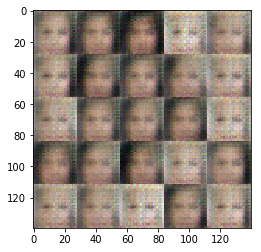

Epoch: 1/1; Batch:   825; Discriminator Loss: 1.1031... Generator Loss: 2.8239
Epoch: 1/1; Batch:   850; Discriminator Loss: 0.9990... Generator Loss: 1.9916
Epoch: 1/1; Batch:   875; Discriminator Loss: 0.9166... Generator Loss: 0.7473
Epoch: 1/1; Batch:   900; Discriminator Loss: 0.6596... Generator Loss: 1.2140
Epoch: 1/1; Batch:   925; Discriminator Loss: 0.7695... Generator Loss: 1.3615
Epoch: 1/1; Batch:   950; Discriminator Loss: 0.8026... Generator Loss: 1.5796
Epoch: 1/1; Batch:   975; Discriminator Loss: 0.8925... Generator Loss: 2.0154
Epoch: 1/1; Batch:  1000; Discriminator Loss: 0.7523... Generator Loss: 1.1757


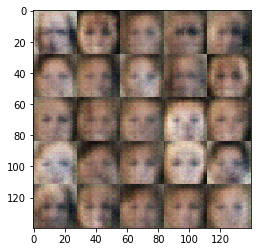

Epoch: 1/1; Batch:  1025; Discriminator Loss: 0.9390... Generator Loss: 0.9772
Epoch: 1/1; Batch:  1050; Discriminator Loss: 1.0292... Generator Loss: 0.6524
Epoch: 1/1; Batch:  1075; Discriminator Loss: 0.6348... Generator Loss: 1.2130
Epoch: 1/1; Batch:  1100; Discriminator Loss: 0.4863... Generator Loss: 3.3877
Epoch: 1/1; Batch:  1125; Discriminator Loss: 0.3545... Generator Loss: 3.3480
Epoch: 1/1; Batch:  1150; Discriminator Loss: 0.4942... Generator Loss: 5.1581
Epoch: 1/1; Batch:  1175; Discriminator Loss: 0.7290... Generator Loss: 7.0947
Epoch: 1/1; Batch:  1200; Discriminator Loss: 0.1394... Generator Loss: 4.0387


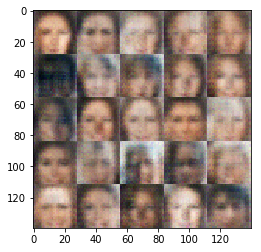

Epoch: 1/1; Batch:  1225; Discriminator Loss: 0.1882... Generator Loss: 3.5399
Epoch: 1/1; Batch:  1250; Discriminator Loss: 0.7862... Generator Loss: 7.0418
Epoch: 1/1; Batch:  1275; Discriminator Loss: 0.3843... Generator Loss: 1.5572
Epoch: 1/1; Batch:  1300; Discriminator Loss: 1.5533... Generator Loss: 0.2936
Epoch: 1/1; Batch:  1325; Discriminator Loss: 0.9445... Generator Loss: 0.5965
Epoch: 1/1; Batch:  1350; Discriminator Loss: 0.4656... Generator Loss: 1.4336
Epoch: 1/1; Batch:  1375; Discriminator Loss: 0.0811... Generator Loss: 5.9616
Epoch: 1/1; Batch:  1400; Discriminator Loss: 0.0784... Generator Loss: 5.1802


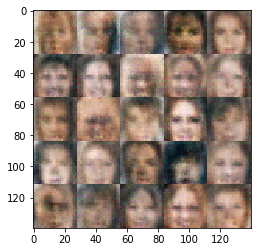

Epoch: 1/1; Batch:  1425; Discriminator Loss: 0.0725... Generator Loss: 5.7932
Epoch: 1/1; Batch:  1450; Discriminator Loss: 0.2421... Generator Loss: 2.1344
Epoch: 1/1; Batch:  1475; Discriminator Loss: 1.2985... Generator Loss: 9.6789
Epoch: 1/1; Batch:  1500; Discriminator Loss: 0.3503... Generator Loss: 1.7586
Epoch: 1/1; Batch:  1525; Discriminator Loss: 1.3118... Generator Loss: 0.4623
Epoch: 1/1; Batch:  1550; Discriminator Loss: 0.0512... Generator Loss: 7.3156
Epoch: 1/1; Batch:  1575; Discriminator Loss: 0.5686... Generator Loss: 0.9974
Epoch: 1/1; Batch:  1600; Discriminator Loss: 0.5562... Generator Loss: 1.1614


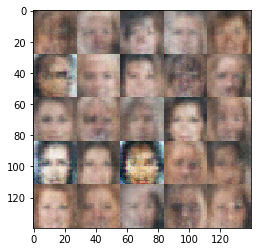

Epoch: 1/1; Batch:  1625; Discriminator Loss: 0.2674... Generator Loss: 2.0630
Epoch: 1/1; Batch:  1650; Discriminator Loss: 0.6423... Generator Loss: 9.8485
Epoch: 1/1; Batch:  1675; Discriminator Loss: 0.2285... Generator Loss: 7.2067
Epoch: 1/1; Batch:  1700; Discriminator Loss: 0.7290... Generator Loss: 9.6413
Epoch: 1/1; Batch:  1725; Discriminator Loss: 1.2558... Generator Loss: 0.4080
Epoch: 1/1; Batch:  1750; Discriminator Loss: 0.5915... Generator Loss: 1.0058
Epoch: 1/1; Batch:  1775; Discriminator Loss: 0.1383... Generator Loss: 9.2876
Epoch: 1/1; Batch:  1800; Discriminator Loss: 0.3837... Generator Loss: 1.5724


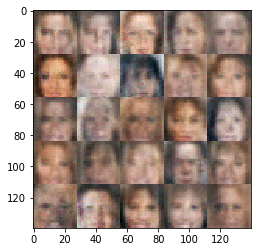

Epoch: 1/1; Batch:  1825; Discriminator Loss: 0.0774... Generator Loss: 3.9929
Epoch: 1/1; Batch:  1850; Discriminator Loss: 0.1160... Generator Loss: 5.1989
Epoch: 1/1; Batch:  1875; Discriminator Loss: 0.0731... Generator Loss: 4.4335
Epoch: 1/1; Batch:  1900; Discriminator Loss: 0.1229... Generator Loss: 8.4174
Epoch: 1/1; Batch:  1925; Discriminator Loss: 0.8330... Generator Loss: 0.7997
Epoch: 1/1; Batch:  1950; Discriminator Loss: 0.1712... Generator Loss: 8.0980
Epoch: 1/1; Batch:  1975; Discriminator Loss: 0.1862... Generator Loss: 9.6973
Epoch: 1/1; Batch:  2000; Discriminator Loss: 0.1385... Generator Loss: 3.4451


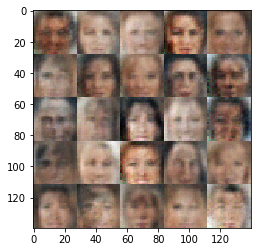

Epoch: 1/1; Batch:  2025; Discriminator Loss: 0.1144... Generator Loss: 4.0240
Epoch: 1/1; Batch:  2050; Discriminator Loss: 0.1070... Generator Loss: 3.4463
Epoch: 1/1; Batch:  2075; Discriminator Loss: 0.1501... Generator Loss: 9.8372
Epoch: 1/1; Batch:  2100; Discriminator Loss: 0.2607... Generator Loss: 1.8088
Epoch: 1/1; Batch:  2125; Discriminator Loss: 0.0853... Generator Loss: 3.2293
Epoch: 1/1; Batch:  2150; Discriminator Loss: 0.0538... Generator Loss: 6.2946
Epoch: 1/1; Batch:  2175; Discriminator Loss: 0.1032... Generator Loss: 3.4120
Epoch: 1/1; Batch:  2200; Discriminator Loss: 0.1317... Generator Loss: 6.7561


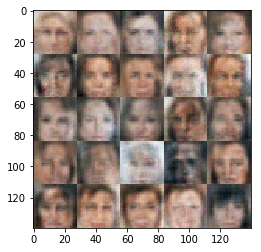

Epoch: 1/1; Batch:  2225; Discriminator Loss: 0.1878... Generator Loss: 2.7024
Epoch: 1/1; Batch:  2250; Discriminator Loss: 0.1186... Generator Loss: 6.8540
Epoch: 1/1; Batch:  2275; Discriminator Loss: 0.5994... Generator Loss: 0.9330
Epoch: 1/1; Batch:  2300; Discriminator Loss: 0.4958... Generator Loss: 1.1517
Epoch: 1/1; Batch:  2325; Discriminator Loss: 0.0884... Generator Loss: 4.8349
Epoch: 1/1; Batch:  2350; Discriminator Loss: 0.2121... Generator Loss: 2.5569
Epoch: 1/1; Batch:  2375; Discriminator Loss: 0.0715... Generator Loss: 7.3372
Epoch: 1/1; Batch:  2400; Discriminator Loss: 0.7535... Generator Loss: 9.1520


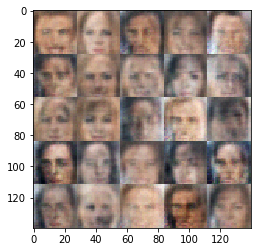

Epoch: 1/1; Batch:  2425; Discriminator Loss: 0.2103... Generator Loss: 6.7063
Epoch: 1/1; Batch:  2450; Discriminator Loss: 0.0338... Generator Loss: 5.6889
Epoch: 1/1; Batch:  2475; Discriminator Loss: 0.8683... Generator Loss: 0.6723
Epoch: 1/1; Batch:  2500; Discriminator Loss: 0.5943... Generator Loss: 1.0115
Epoch: 1/1; Batch:  2525; Discriminator Loss: 0.3759... Generator Loss: 7.6574
Epoch: 1/1; Batch:  2550; Discriminator Loss: 0.3613... Generator Loss: 1.5033
Epoch: 1/1; Batch:  2575; Discriminator Loss: 0.0849... Generator Loss: 3.9246
Epoch: 1/1; Batch:  2600; Discriminator Loss: 0.1413... Generator Loss: 9.8437


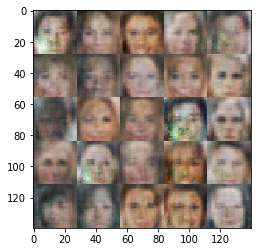

Epoch: 1/1; Batch:  2625; Discriminator Loss: 0.1229... Generator Loss: 4.3847
Epoch: 1/1; Batch:  2650; Discriminator Loss: 0.7403... Generator Loss: 11.7620
Epoch: 1/1; Batch:  2675; Discriminator Loss: 0.0876... Generator Loss: 10.7864
Epoch: 1/1; Batch:  2700; Discriminator Loss: 0.0193... Generator Loss: 9.2034
Epoch: 1/1; Batch:  2725; Discriminator Loss: 0.1313... Generator Loss: 9.9134
Epoch: 1/1; Batch:  2750; Discriminator Loss: 0.1025... Generator Loss: 2.8541
Epoch: 1/1; Batch:  2775; Discriminator Loss: 0.9289... Generator Loss: 9.1960
Epoch: 1/1; Batch:  2800; Discriminator Loss: 1.1257... Generator Loss: 0.5419


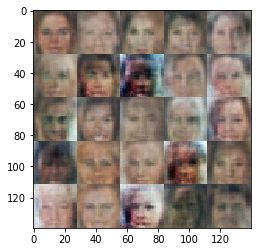

Epoch: 1/1; Batch:  2825; Discriminator Loss: 0.0601... Generator Loss: 5.4572
Epoch: 1/1; Batch:  2850; Discriminator Loss: 1.4951... Generator Loss: 12.1858
Epoch: 1/1; Batch:  2875; Discriminator Loss: 0.0520... Generator Loss: 5.2833
Epoch: 1/1; Batch:  2900; Discriminator Loss: 0.0597... Generator Loss: 11.2372
Epoch: 1/1; Batch:  2925; Discriminator Loss: 0.1665... Generator Loss: 7.7900
Epoch: 1/1; Batch:  2950; Discriminator Loss: 0.0410... Generator Loss: 6.0751
Epoch: 1/1; Batch:  2975; Discriminator Loss: 0.0348... Generator Loss: 6.1114
Epoch: 1/1; Batch:  3000; Discriminator Loss: 0.6339... Generator Loss: 0.9483


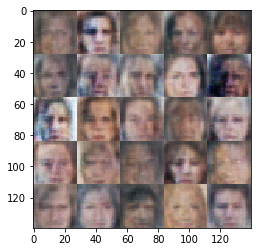

Epoch: 1/1; Batch:  3025; Discriminator Loss: 0.0885... Generator Loss: 9.8124
Epoch: 1/1; Batch:  3050; Discriminator Loss: 0.1718... Generator Loss: 7.2242
Epoch: 1/1; Batch:  3075; Discriminator Loss: 0.2179... Generator Loss: 5.9530
Epoch: 1/1; Batch:  3100; Discriminator Loss: 0.2577... Generator Loss: 1.7790
Epoch: 1/1; Batch:  3125; Discriminator Loss: 0.0385... Generator Loss: 11.2767
Epoch: 1/1; Batch:  3150; Discriminator Loss: 0.0644... Generator Loss: 5.8711


In [16]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.3



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.